# 1. Perkenalan 

**Nama : Dimas Furqon P.** 
**Kelas : Data Science Delta Indie Course**

**Nama Project : Final Project 2.**



# 2. Latar Belakang

## 2.a Data Overview

Mental Health Diagnosis and Treatment Monitoring Dataset adalah data yang berisi dari 500 baris yang mewakili kesehatan mental berdasarkan hasil diagnosis kesehatan mental dari kejadian nyata, rencana perawatan, dan hasil. Termasuk didalamnya demografi pasien, keparahan gejala, pengobatan, tipe terapi dan jejak peningkatan. **Dataset ini bersifat sintetis dan dibuat untuk penelitian dan tujuan analitis**


Beberapa variabel yang terdapat dalam dataset ini dan dapat dianalisis antara lain: 

1. **Patient ID**: Identitas unik pasien
2. **Age**: Usia Pasien
3. **Gender**: Laki-laki atau perempuan
4. **Diagnosis**: Kondisi Mental Health (e.g., Anxiety, Depression).
5. **Symptom Severity (1-10)**: Keparahan gejala (skala 1-10).
6. **Mood Score (1-10)**: Kondisi mood pada saat perawatan (skala 1-10).
7. **Sleep Quality (1-10)**: Kualitas tidur pasien yang dilaporkan(skala 1-10).
8. **Physical Activity**: Aktifitas(jam) dalam 1 pekan.
9. **Medication**: Pengobatan/obat yang diberikan(e.g., SSRIs, Antidepressants).
10. **Therapy Type**: Jenis terapi (e.g., CBT, DBT).
11. **Treatment Start Date**: Tanggal mulai perawatan.
12. **Treatment Duration**: Durasi perawatan dalam sepekan.
13. **Stress Level (1-10)**: Level Stres pasien.
14. **Outcome**: Hasil perawatan (e.g., Improved, Deteriorated).
15. **Treatment Progress (1-10)**: Perkembangan selama perawatan.
16. **AI-Detected Emotional State**: Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious).
17. **Adherence to Treatment (%)**: Persentase kepatuhan terhadap perawatan.

Kasus yang dapat digunakan

- **Klasifikasi Diagnosis**: Mengklasifikasikan pasien berdasarkan kondisi mental health mereka.
- **Prediksi Hasil**: Memprediksi "Outcomes" berdasarkan data pasien.
- **Monitoring tingkat kepatuhan**: Melakukan analisis kepatuhan pasien dan efeknya terhadap "Outcomes".
- **Deteksi Kondisi Emosional**: Menggunakan AI untuk mendeteksi jejak kondisi emosional.
- **Kemanjuran perawatan**: Evaluate the impact of different therapies on progress.
- 
Ethical Considerations
Ensure that patient data is anonymized, and models are tested for fairness and bias in their predictions. This dataset is synthetic and does not represent real patient information.

## 2.b Data Objective

Final Project 2 ini dibuat guna mengevaluasi konsep Machine Learning bertipe Klasifikasi dengan :

● Mampu memahami konsep Regression dan mampu persiapkan data untuk digunakan dengan Ensemble Model

● Mampu melakukan seleksi model terbaik

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# 3. Import Pustaka (Library)

In [173]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from pandas_dq import dq_report,Fix_DQ

ModuleNotFoundError: No module named 'folium'

# 4. Data Loading

## 4.1 Memanggil Dataset

In [177]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df.head(10)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
5,6,28,Male,Panic Disorder,8,7,6,4,SSRIs,Cognitive Behavioral Therapy,2024-01-11,13,9,No Change,7,Stressed,82
6,7,59,Male,Generalized Anxiety,6,6,5,3,Mood Stabilizers,Dialectical Behavioral Therapy,2024-02-21,13,8,Deteriorated,5,Anxious,79
7,8,32,Female,Major Depressive Disorder,5,3,5,2,Antidepressants,Cognitive Behavioral Therapy,2024-02-03,12,5,No Change,6,Stressed,74
8,9,21,Female,Major Depressive Disorder,6,7,7,10,Antidepressants,Mindfulness-Based Therapy,2024-01-16,15,5,No Change,6,Neutral,67
9,10,21,Female,Panic Disorder,9,5,9,7,Antidepressants,Cognitive Behavioral Therapy,2024-01-03,11,8,No Change,8,Depressed,89


## 4.2 Melihat ukuran/dimensi data (baris,kolom)

In [180]:
df.shape

(500, 17)

## 4.3 Pengecekan nama kolom 

In [183]:
da = df.columns.values
da
dc = pd.DataFrame({'Nama kolom':da})
dc

,Nama kolom
0,Patient ID
1,Age
2,Gender
3,Diagnosis
4,Symptom Severity (1-10)
5,Mood Score (1-10)
6,Sleep Quality (1-10)
7,Physical Activity (hrs/week)
8,Medication
9,Therapy Type


## 4.4 Penjelasan per kolom

In [186]:
import pandas as pd

# Define the data
data = {
    "Key Features": [
        "Patient ID",
        "Age",
        "Gender",
        "Diagnosis",
        "Symptom Severity (1-10)",
        "Mood Score (1-10)",
        "Sleep Quality (1-10)",
        "Physical Activity",
        "Medication",
        "Therapy Type",
        "Treatment Start Date",
        "Treatment Duration",
        "Stress Level (1-10)",
        "Outcome",
        "Treatment Progress (1-10)",
        "AI-Detected Emotional State",
        "Adherence to Treatment (%)"
    ],
    "Explanation": [
        "Identitas unik pasien",
        "Usia Pasien",
        "Laki-laki atau perempuan",
        "Kondisi Mental Health (e.g., Anxiety, Depression)",
        "Keparahan gejala (skala 1-10)",
        "Kondisi mood pada saat perawatan (skala 1-10)",
        "Kualitas tidur pasien yang dilaporkan (skala 1-10)",
        "Aktifitas (jam) dalam 1 pekan",
        "Pengobatan/obat yang diberikan (e.g., SSRIs, Antidepressants)",
        "Jenis terapi (e.g., CBT, DBT)",
        "Tanggal mulai perawatan",
        "Durasi perawatan dalam sepekan",
        "Level Stres pasien",
        "Hasil perawatan (e.g., Improved, Deteriorated)",
        "Perkembangan selama perawatan (skala 1-10)",
        "Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious)",
        "Persentase kepatuhan terhadap perawatan"
    ]
}

# Create the DataFrame with an index column
penjelasan = pd.DataFrame(data)
penjelasan.index += 1  # Add an index starting from 1

# Display the DataFrame
penjelasan



,Key Features,Explanation
1,Patient ID,Identitas unik pasien
2,Age,Usia Pasien
3,Gender,Laki-laki atau perempuan
4,Diagnosis,"Kondisi Mental Health (e.g., Anxiety, Depression)"
5,Symptom Severity (1-10),Keparahan gejala (skala 1-10)
6,Mood Score (1-10),Kondisi mood pada saat perawatan (skala 1-10)
7,Sleep Quality (1-10),Kualitas tidur pasien yang dilaporkan (skala 1...
8,Physical Activity,Aktifitas (jam) dalam 1 pekan
9,Medication,"Pengobatan/obat yang diberikan (e.g., SSRIs, A..."
10,Therapy Type,"Jenis terapi (e.g., CBT, DBT)"


## 4.5 Tipe Data

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

## 4.6 Deskriptif Statistik

In [192]:
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


## 4.7 Pengecekan Missing Value 

In [195]:
df.isna().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [197]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

karena data yang diperoleh dari awal sudah tidak memiliki "missing values" maka kita bisa melewatkan step untuk pembersihan missing value.

## 4.8 Pengecekan data duplikat

In [201]:
df.duplicated().sum()

0

In [199]:
df[df.duplicated()].head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)


setelah kita melakukan peninjauan terhadap dataset, terlihat bahwa data yang kita memiliki sudah berstatus "clean" karena tidak memiliki "missing values" dan "duplicate data"

## 4.9 Penggantian nama kolom

Karena nama kolom pada dataframe masih dirasa terlalu panjang maka perlu dilakukan simplifikasi nama pada kolom yang terlalu panjang.

In [208]:
df.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis',
       'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Medication', 'Therapy Type', 'Treatment Start Date',
       'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome',
       'Treatment Progress (1-10)', 'AI-Detected Emotional State',
       'Adherence to Treatment (%)'], dtype=object)

In [212]:
df.rename(columns={'Symptom Severity (1-10)':'symptom',
                   'Mood Score (1-10)':'mood',
                   'Sleep Quality (1-10)':'sleep',
                   'Physical Activity (hrs/week)':'physical',
                   'Therapy Type':'Therapy',
                   'Treatment Start Date':'treatment',
                   'Treatment Duration (weeks)':'duration',
                   'Stress Level (1-10)':'stress',
                   'Treatment Progress (1-10)':'progres',
                   'AI-Detected Emotional State':'AIstate',
                   'Adherence to Treatment (%)':'Target'                   
                  },inplace = True )

In [236]:
df.tail()

,Patient ID,Age,Gender,Diagnosis,symptom,mood,sleep,physical,Medication,Therapy,treatment,duration,stress,Outcome,progres,AIstate,Target
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73
499,500,58,Male,Bipolar Disorder,5,7,6,2,SSRIs,Cognitive Behavioral Therapy,2024-03-24,10,6,Deteriorated,5,Happy,70


In [234]:
## mengubah format date time pada kolom treatment

df["treatment"] = pd.to_datetime(df["treatment"], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Patient ID  500 non-null    int64         
 1   Age         500 non-null    int64         
 2   Gender      500 non-null    object        
 3   Diagnosis   500 non-null    object        
 4   symptom     500 non-null    int64         
 5   mood        500 non-null    int64         
 6   sleep       500 non-null    int64         
 7   physical    500 non-null    int64         
 8   Medication  500 non-null    object        
 9   Therapy     500 non-null    object        
 10  treatment   500 non-null    datetime64[ns]
 11  duration    500 non-null    int64         
 12  stress      500 non-null    int64         
 13  Outcome     500 non-null    object        
 14  progres     500 non-null    int64         
 15  AIstate     500 non-null    object        
 16  Target      500 non-null  

# 5. Eksplorasi Data Analisis

## 5.1 Statistik Deskriptif

In [239]:
dfc= df.copy()
dfc.describe()

,Patient ID,Age,symptom,mood,sleep,physical,treatment,duration,stress,progres,Target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,2024-02-18 09:53:16.800000,12.110000,7.542000,7.436000,75.45400
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,2024-01-01 00:00:00,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,2024-01-23 18:00:00,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,2024-02-17 00:00:00,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,2024-03-17 00:00:00,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,2024-04-10 00:00:00,16.000000,10.000000,10.000000,90.00000
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,NaN,2.440864,1.709409,1.725067,9.08697


In [261]:
# membuat dataset yang berisi kolom numerik 
df_nm = dfc.describe().columns.values

# membuat dataset yang berisi data kategorik (non numerik)
df_kat = dfc.drop(np.array(df_nm), axis=1)

df_n = dfc.drop(np.array(df_kat.columns.values), axis=1) 
df_num = df_n.drop(['Patient ID','treatment'], axis=1)
df_num
df_kat

,Gender,Diagnosis,Medication,Therapy,Outcome,AIstate
0,Female,Major Depressive Disorder,Mood Stabilizers,Interpersonal Therapy,Deteriorated,Anxious
1,Female,Major Depressive Disorder,Antipsychotics,Interpersonal Therapy,No Change,Neutral
2,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Deteriorated,Happy
3,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Deteriorated,Excited
4,Male,Panic Disorder,Anxiolytics,Interpersonal Therapy,Deteriorated,Excited
...,...,...,...,...,...,...
495,Male,Generalized Anxiety,Mood Stabilizers,Dialectical Behavioral Therapy,Improved,Depressed
496,Male,Panic Disorder,Benzodiazepines,Mindfulness-Based Therapy,Deteriorated,Happy
497,Male,Major Depressive Disorder,Antidepressants,Cognitive Behavioral Therapy,Deteriorated,Neutral
498,Male,Bipolar Disorder,Antidepressants,Mindfulness-Based Therapy,Improved,Anxious


In [291]:
pd.DataFrame(df_kat["Gender"].value_counts())

,count
Gender,
Male,266
Female,234


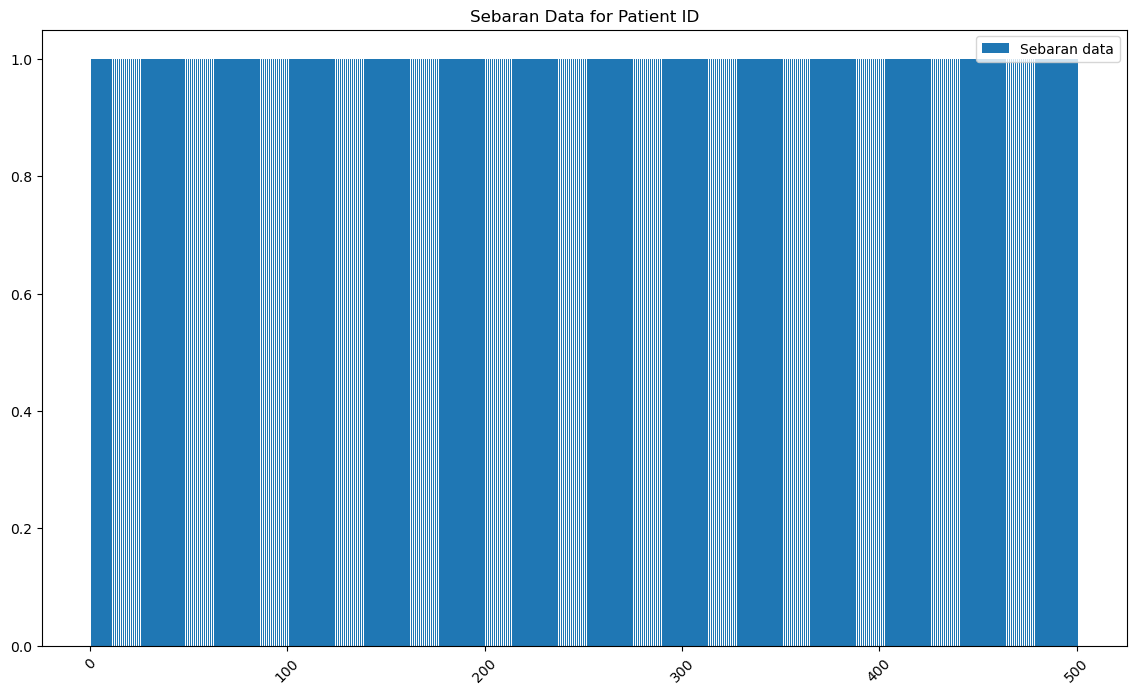

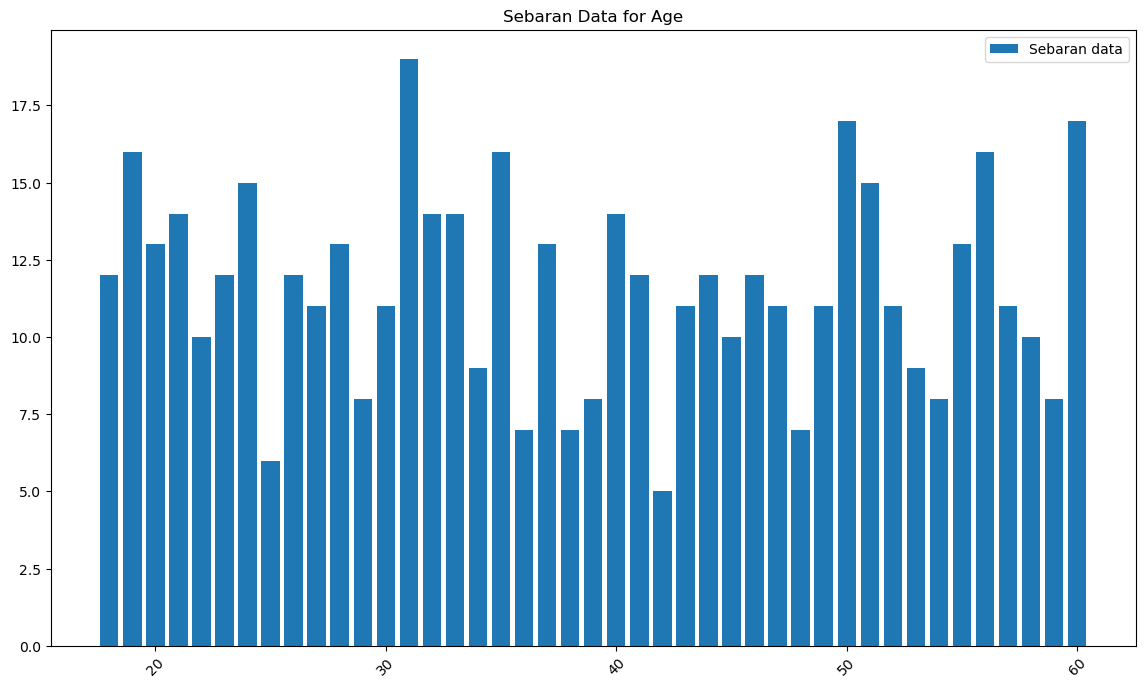

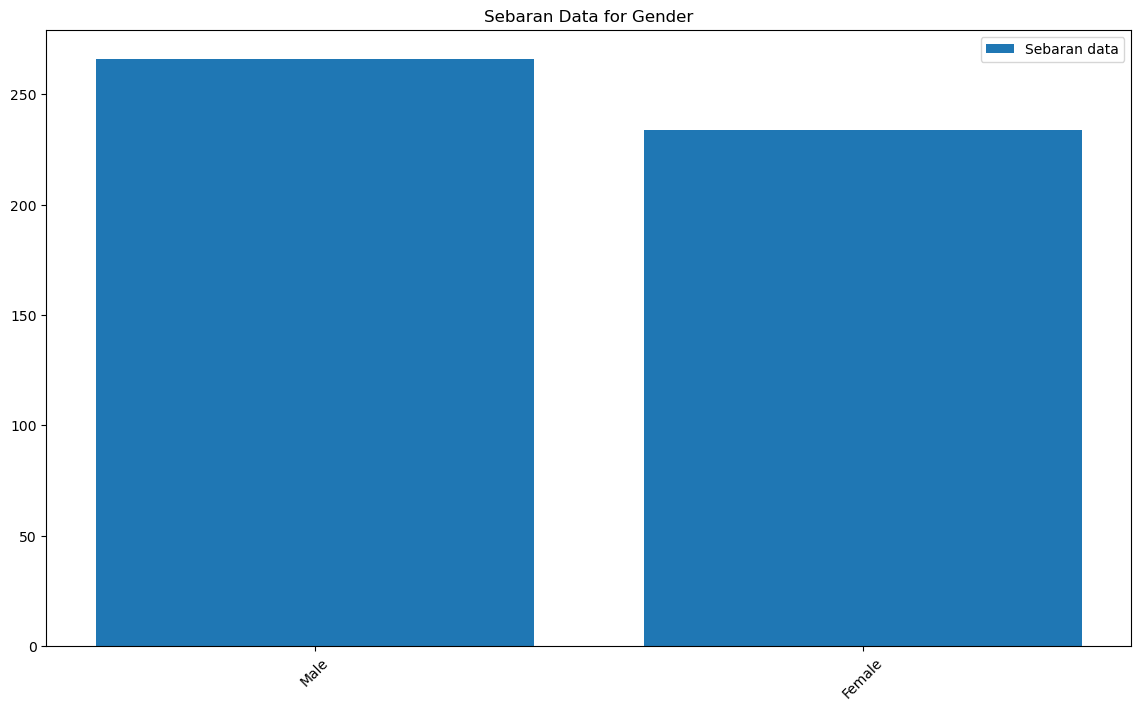

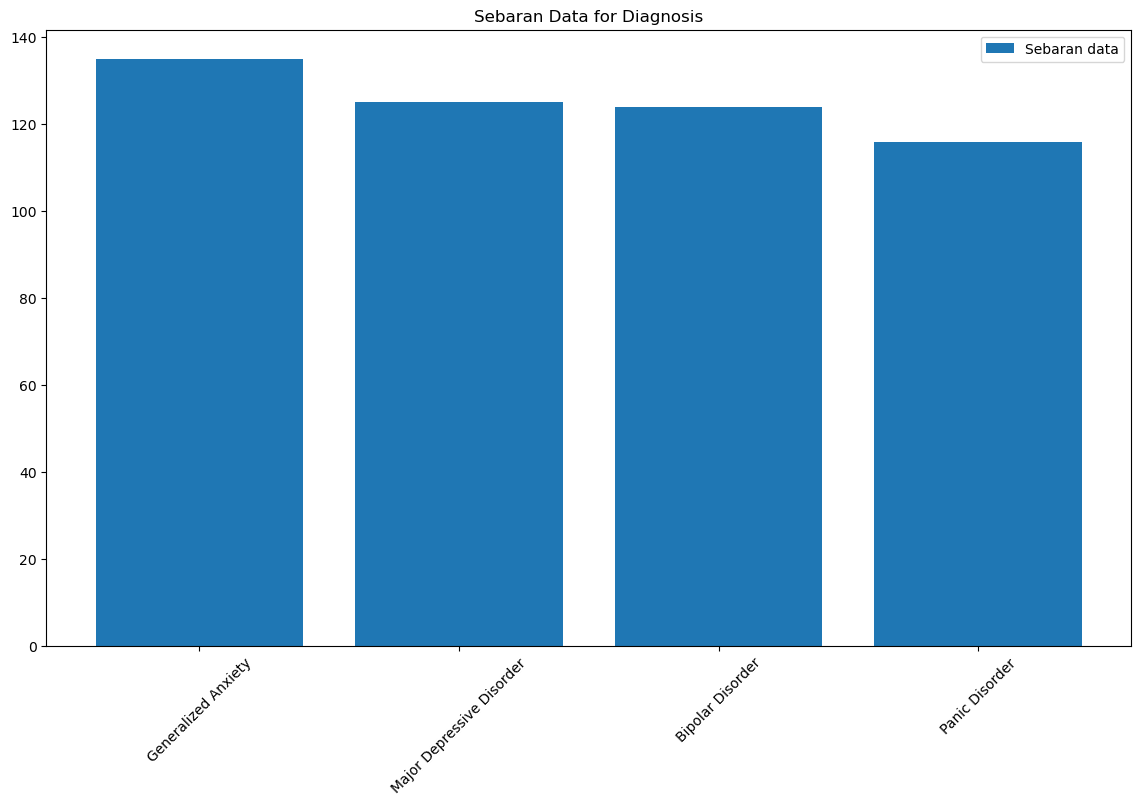

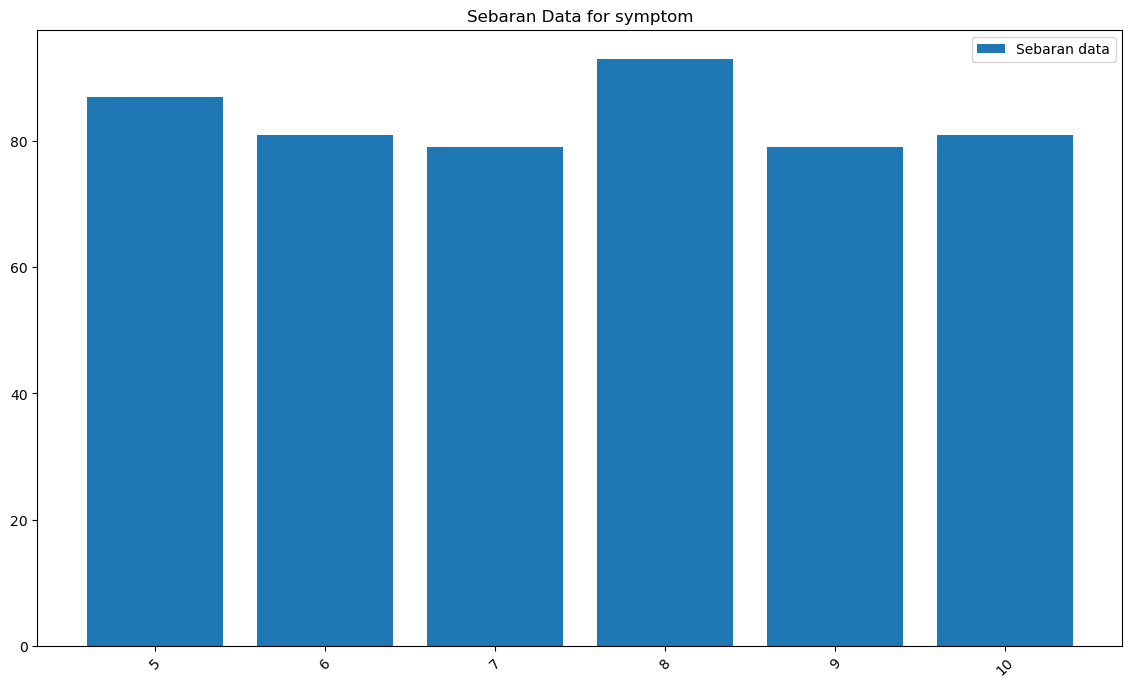

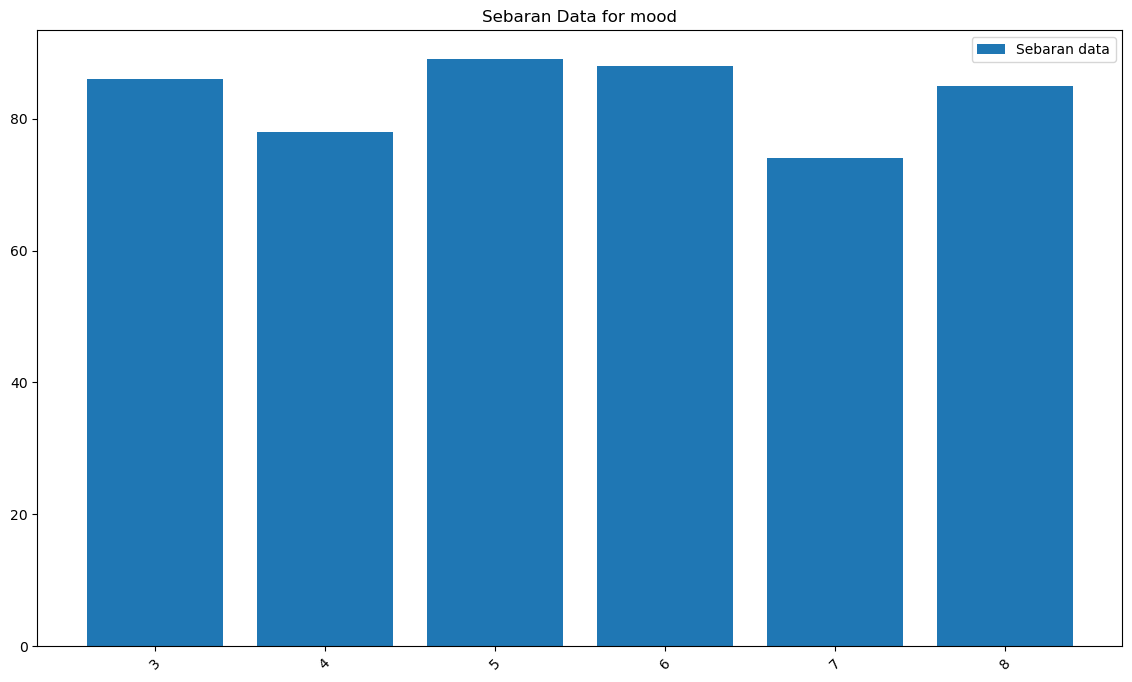

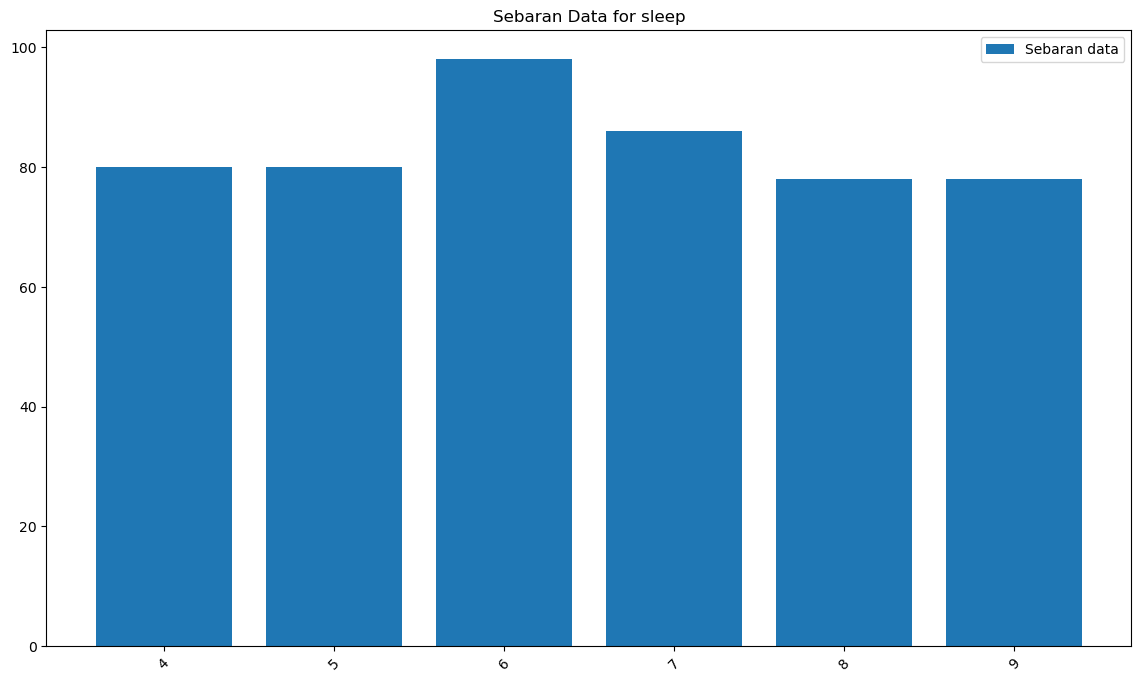

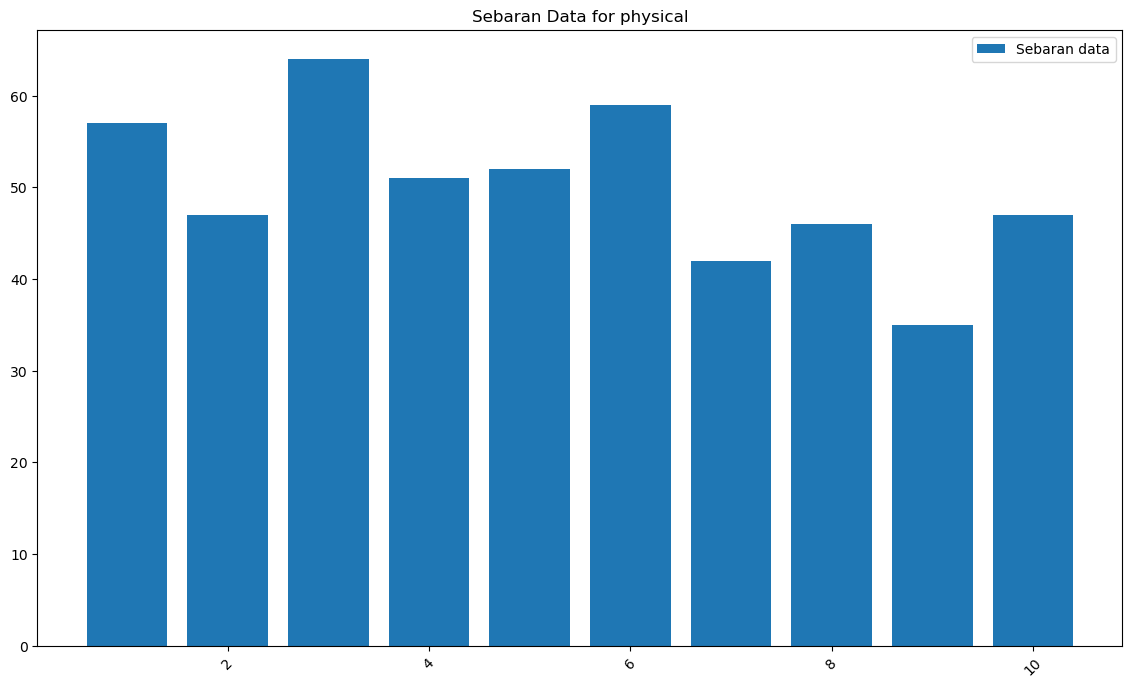

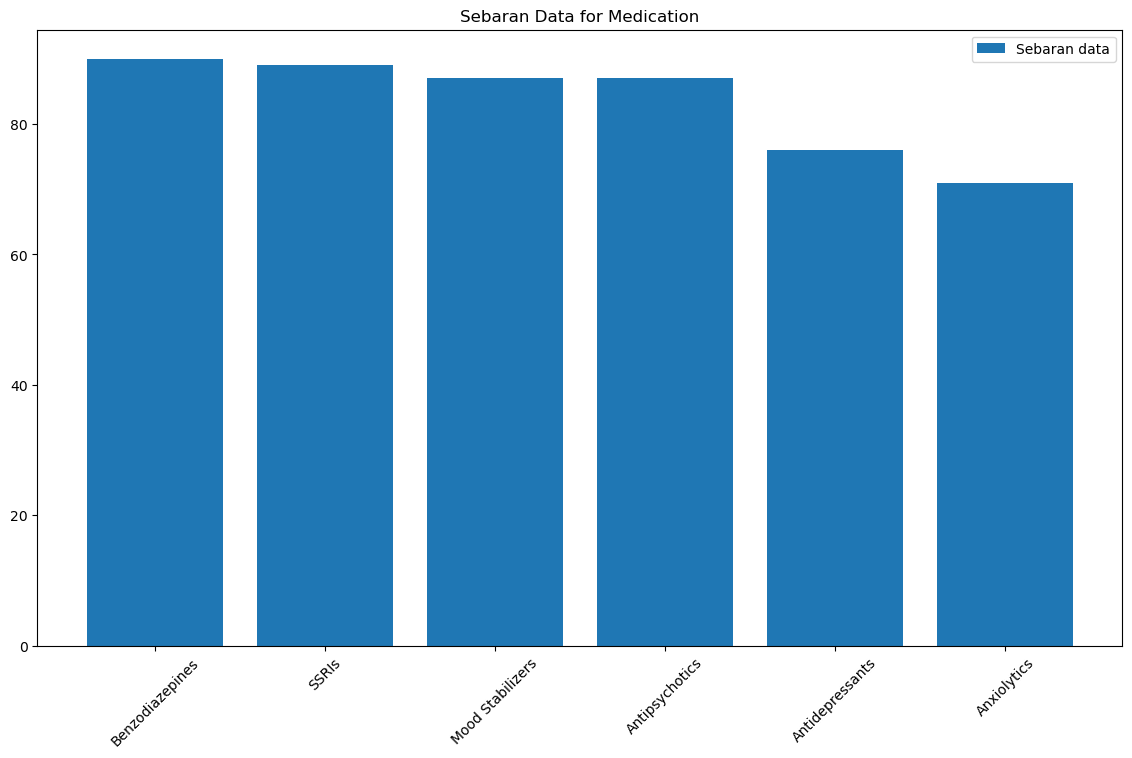

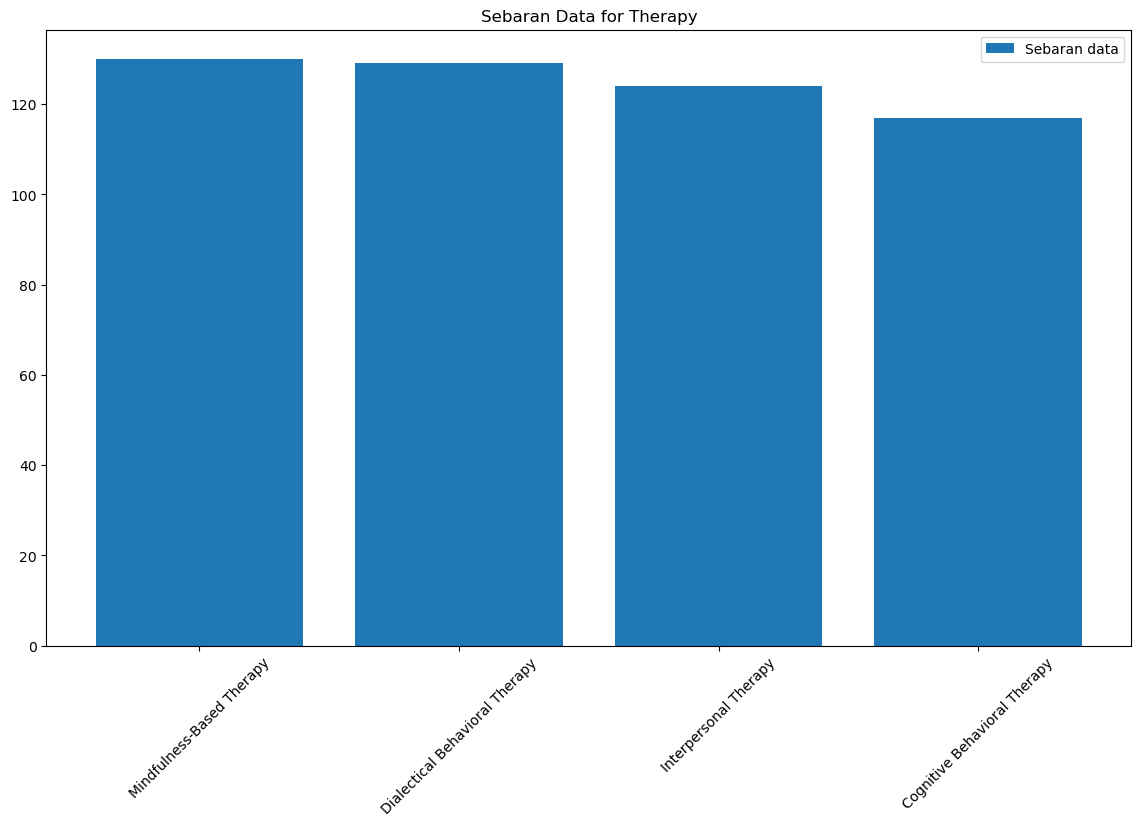

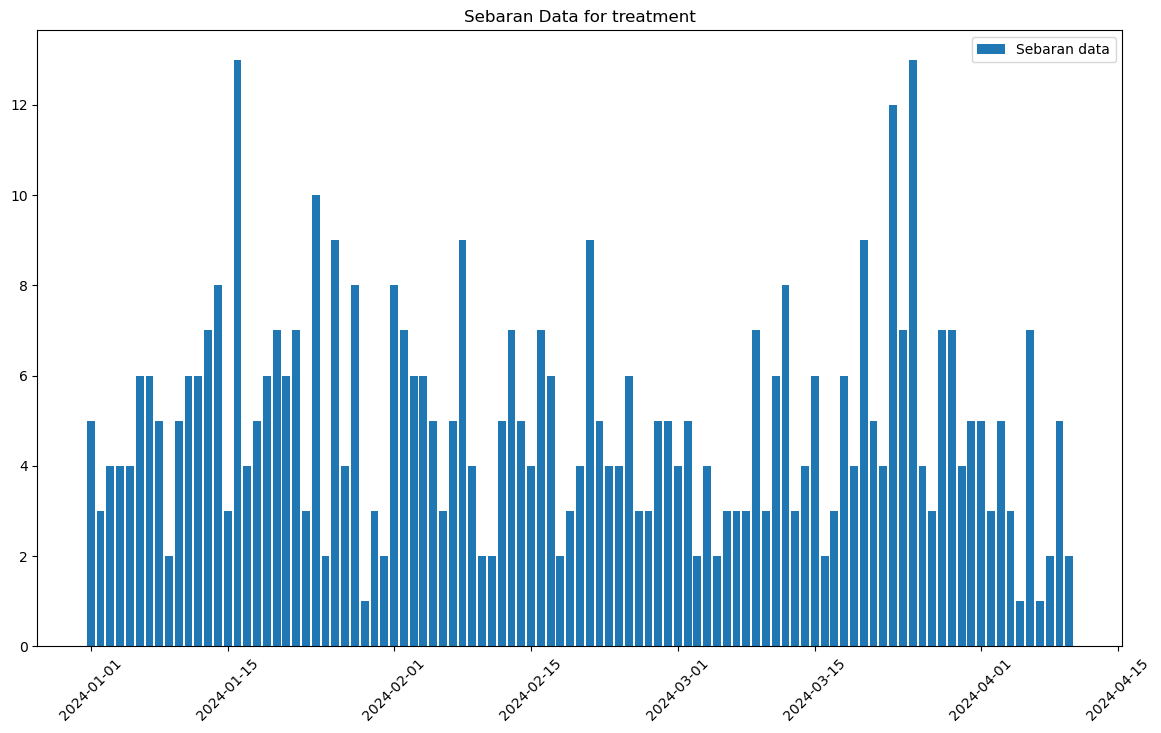

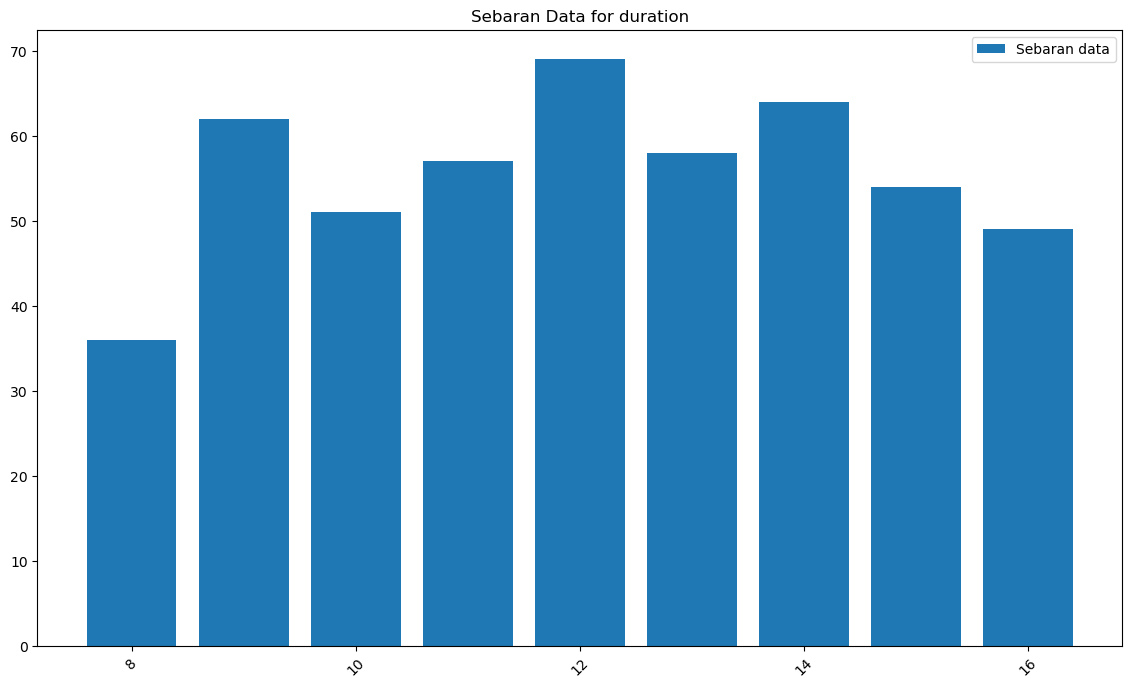

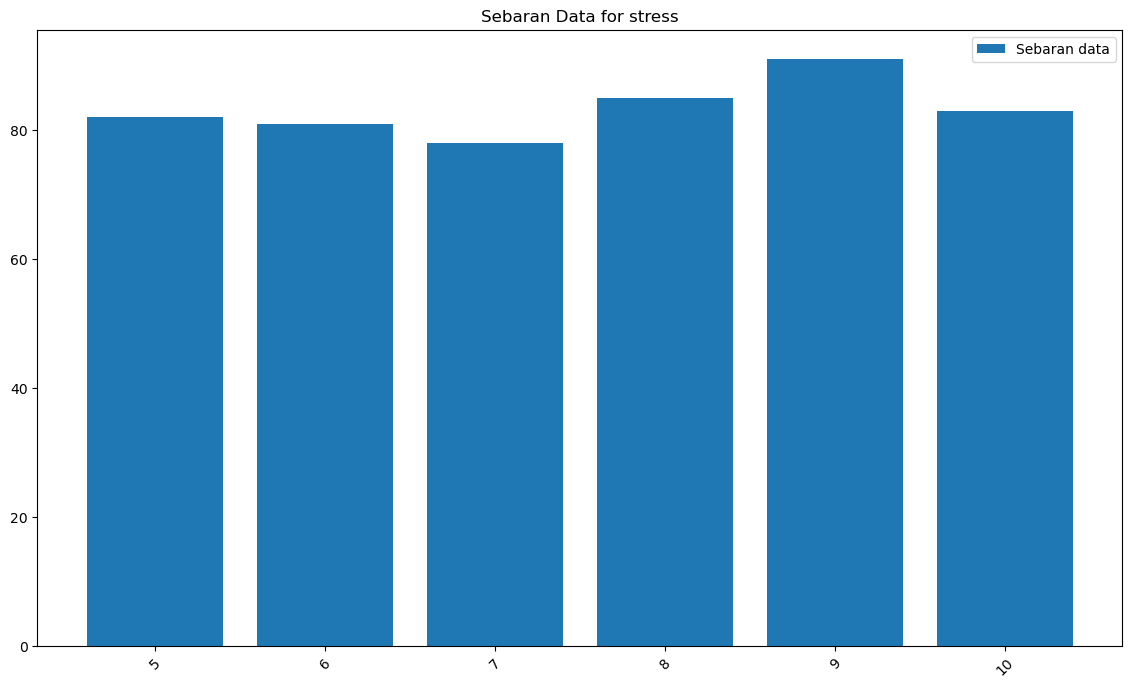

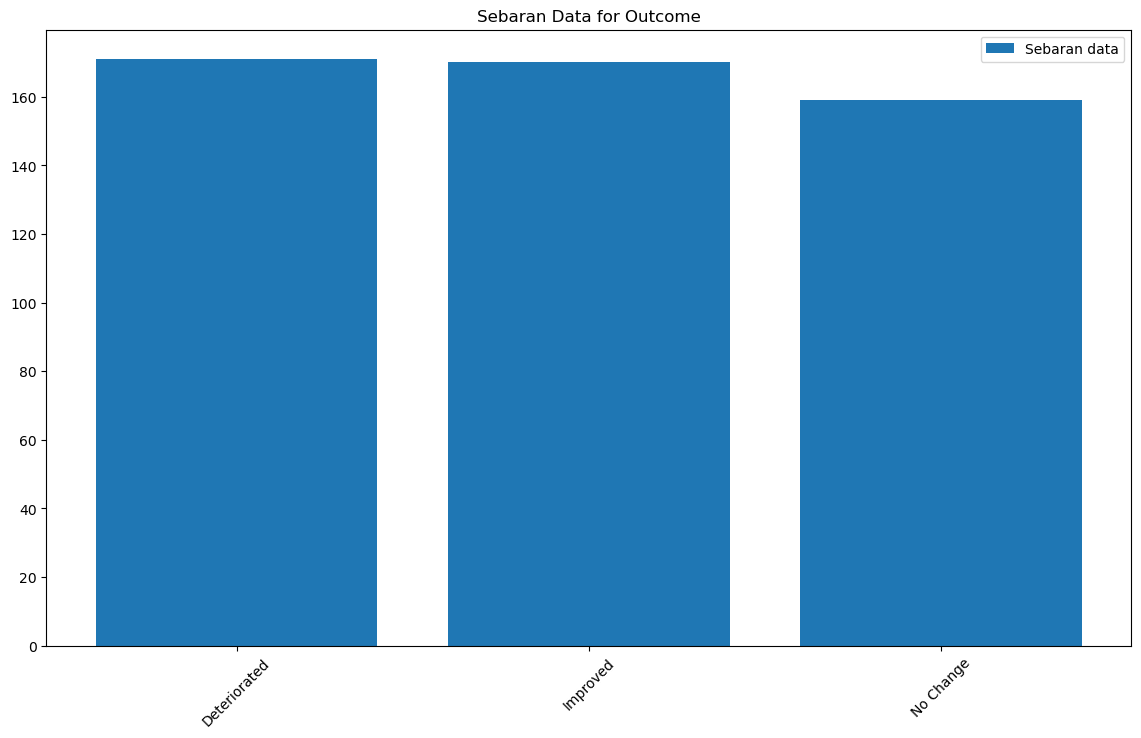

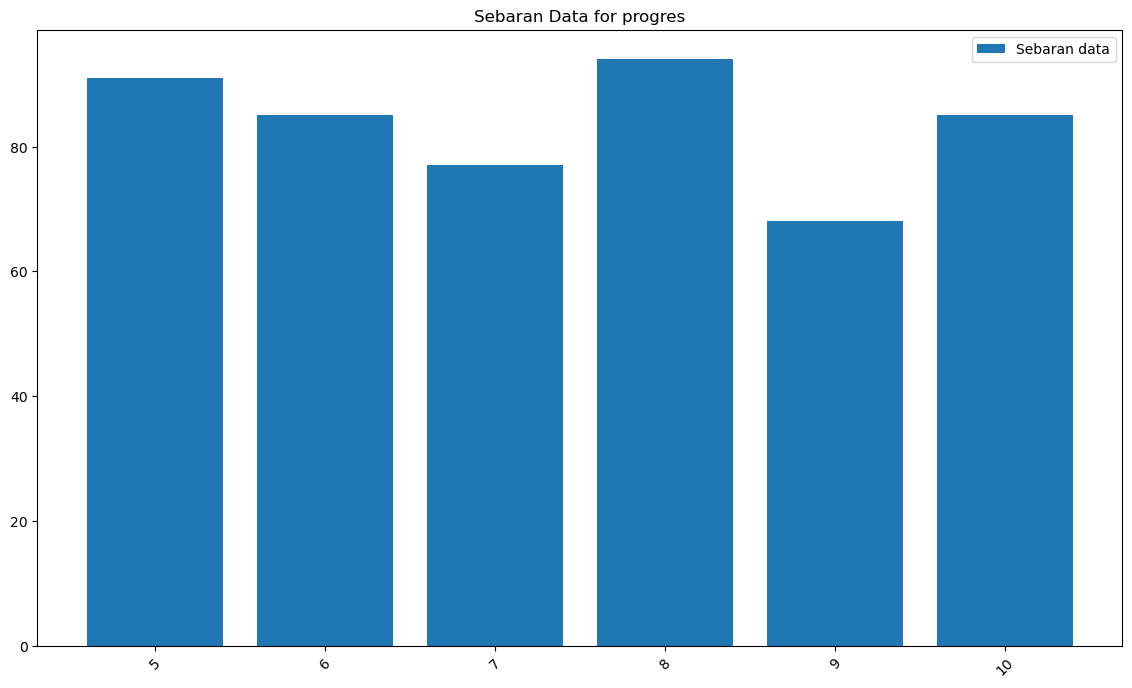

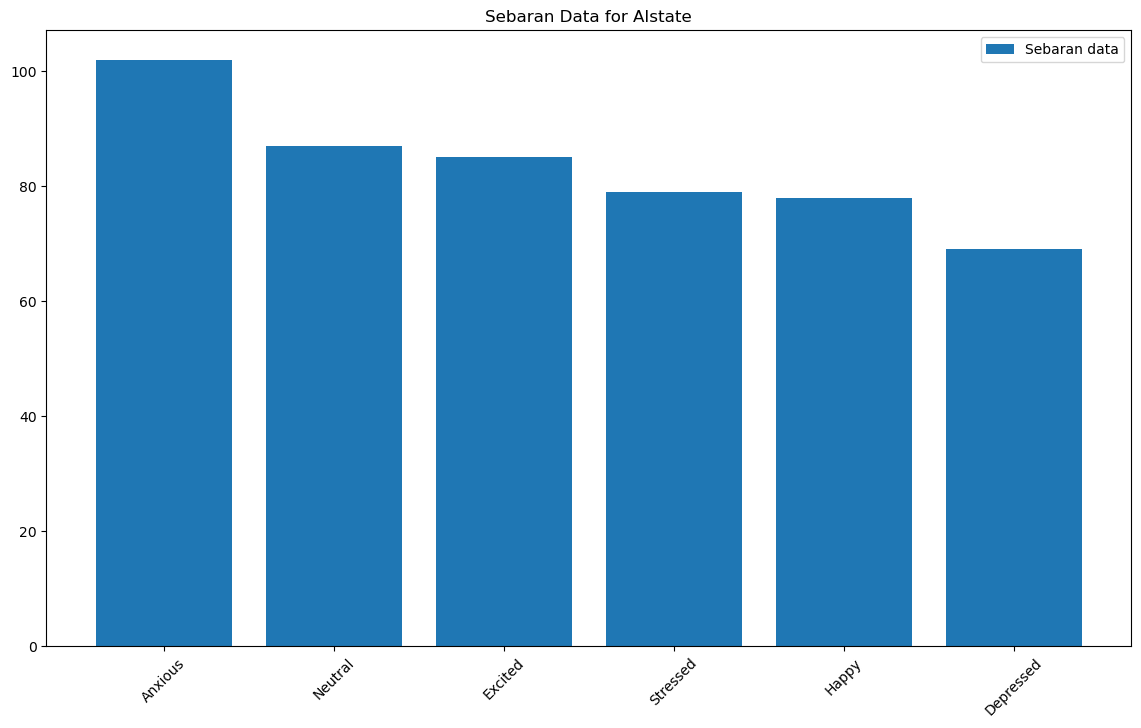

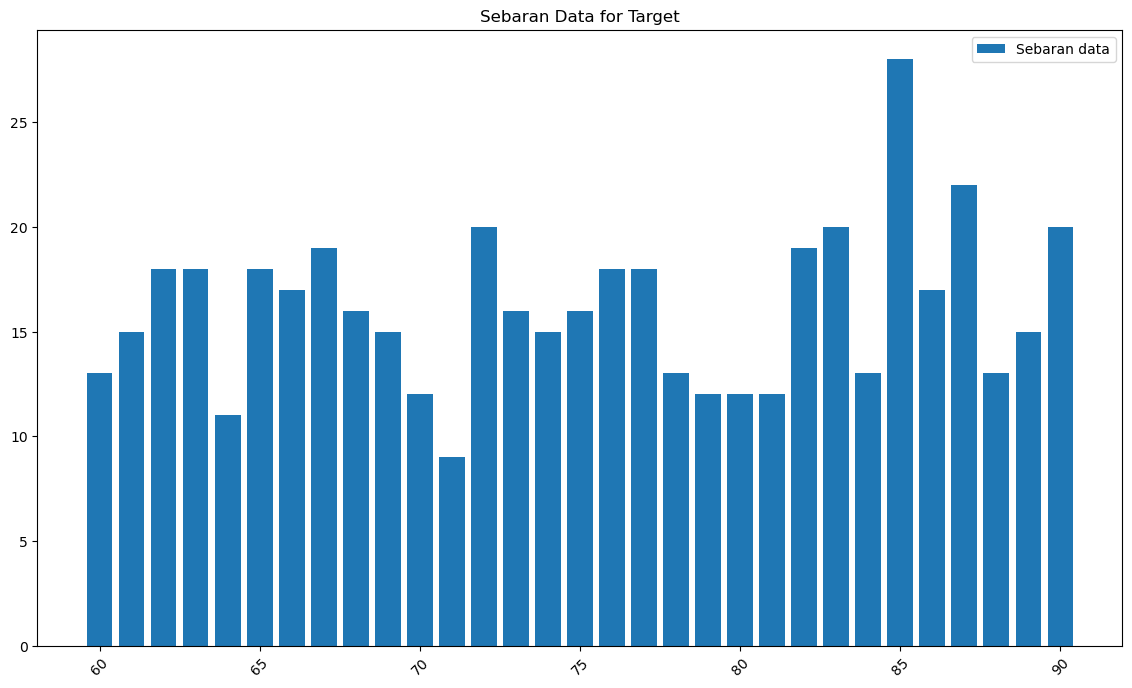

In [305]:
# Melihat grafik sebaran data
for col in df.columns:
    plt.figure(figsize=(14, 8))
    # Use the actual column data for value_counts
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values,label='Sebaran data')
    plt.title(f"Sebaran Data for {col}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3456\3566604275.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


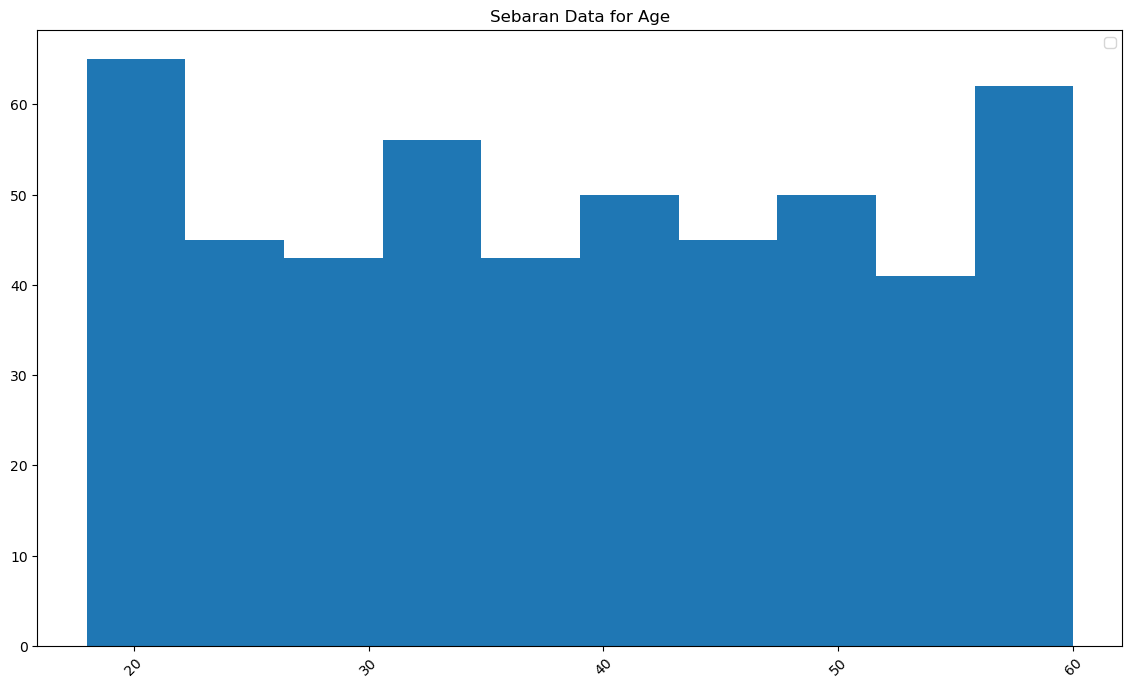

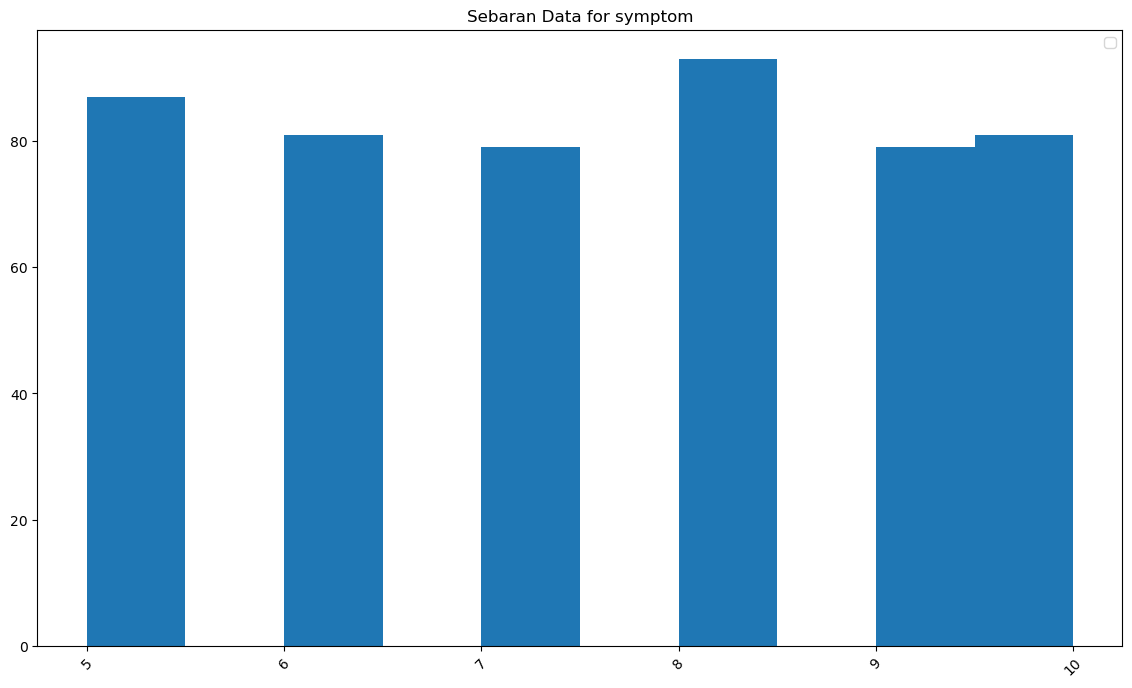

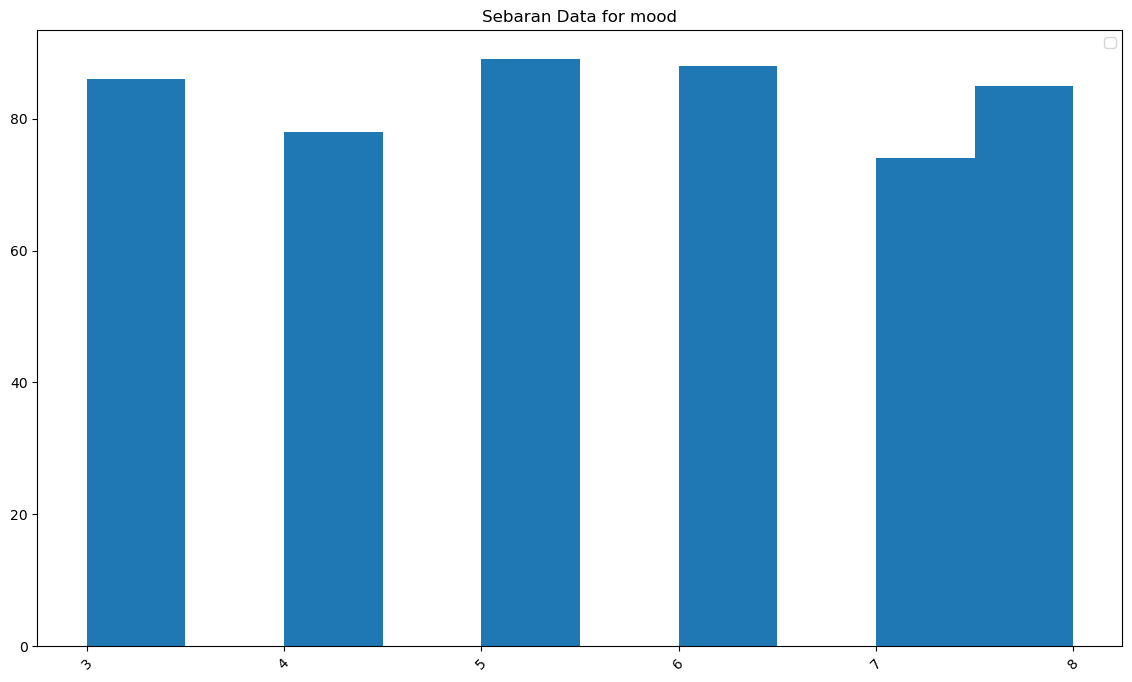

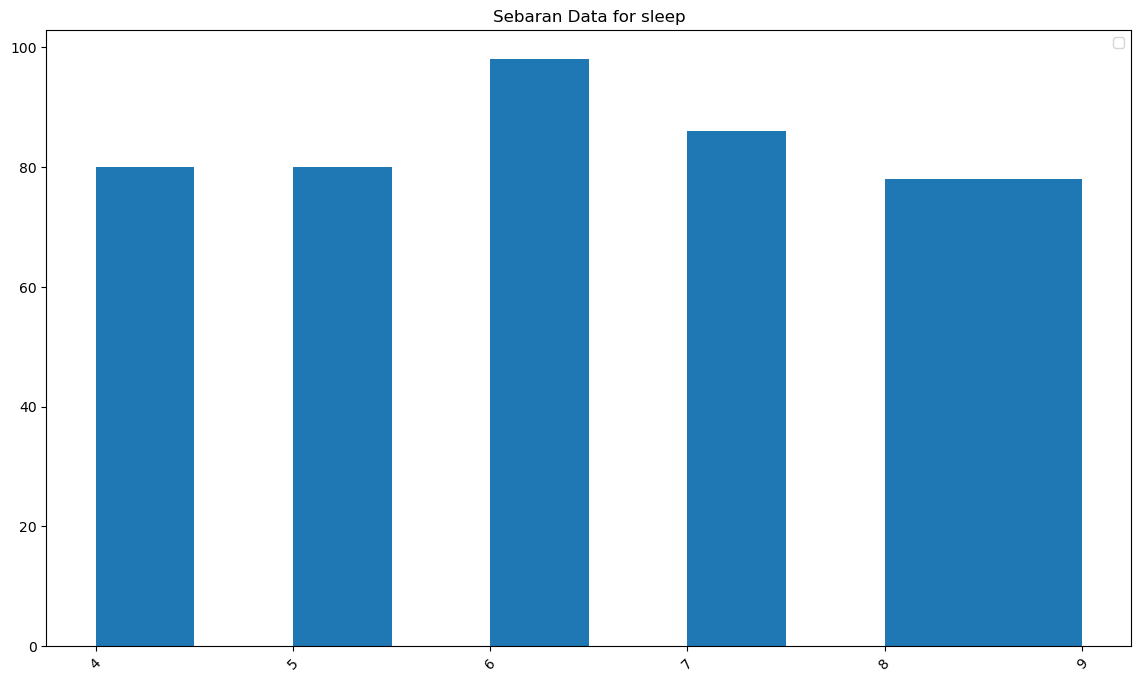

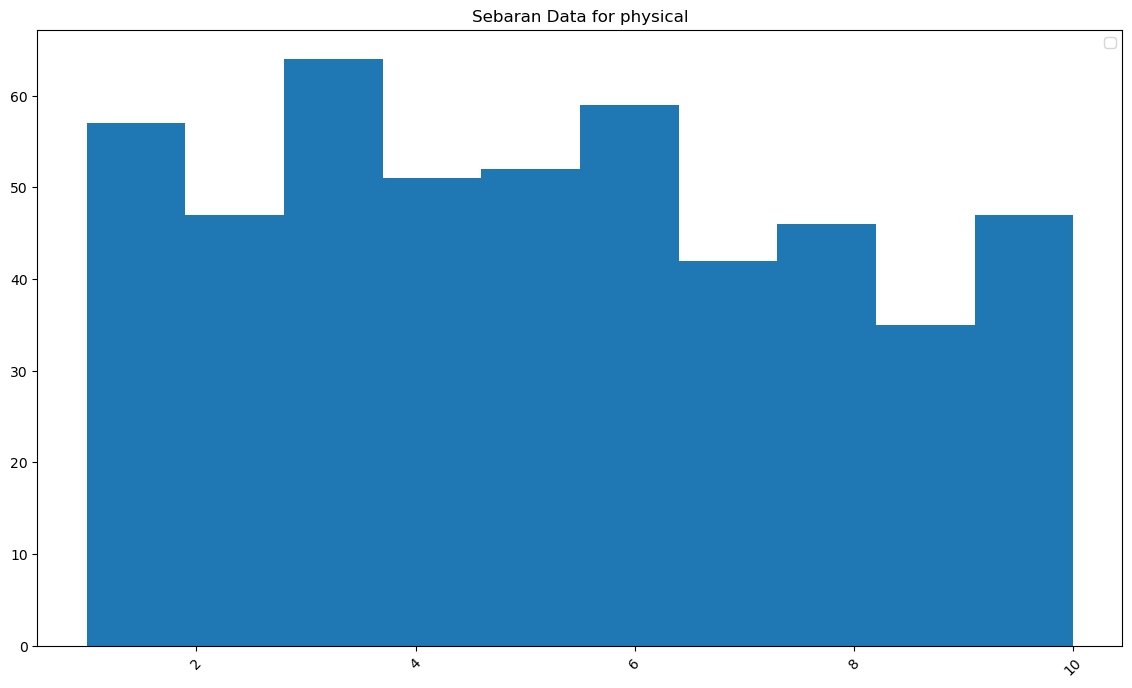

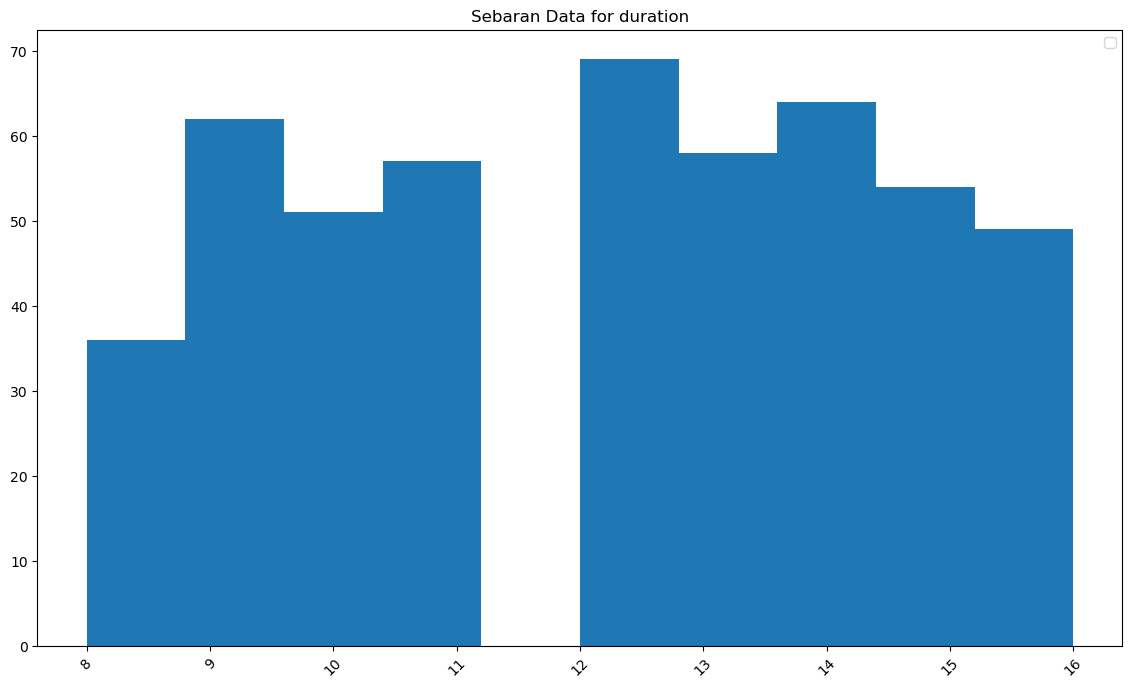

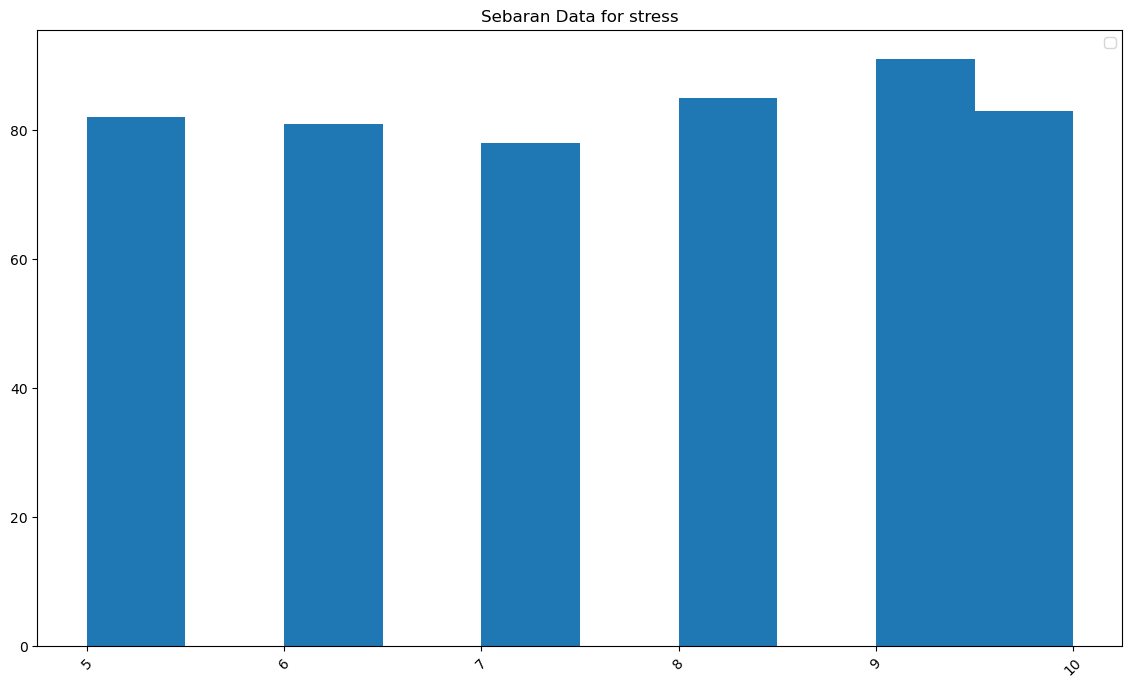

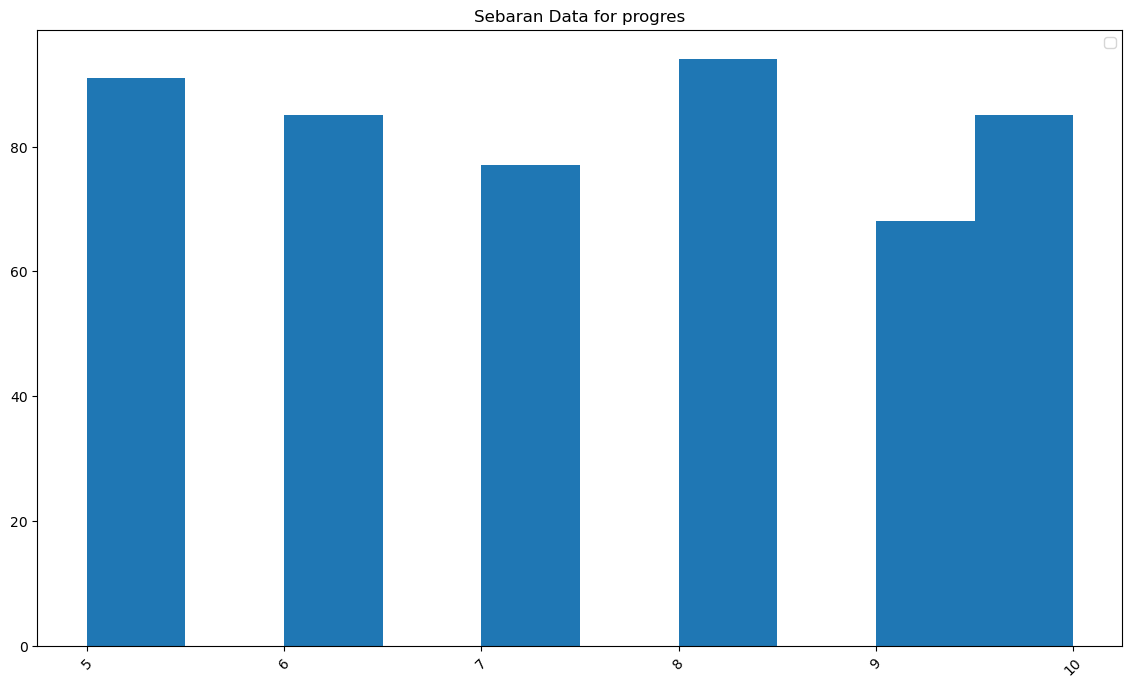

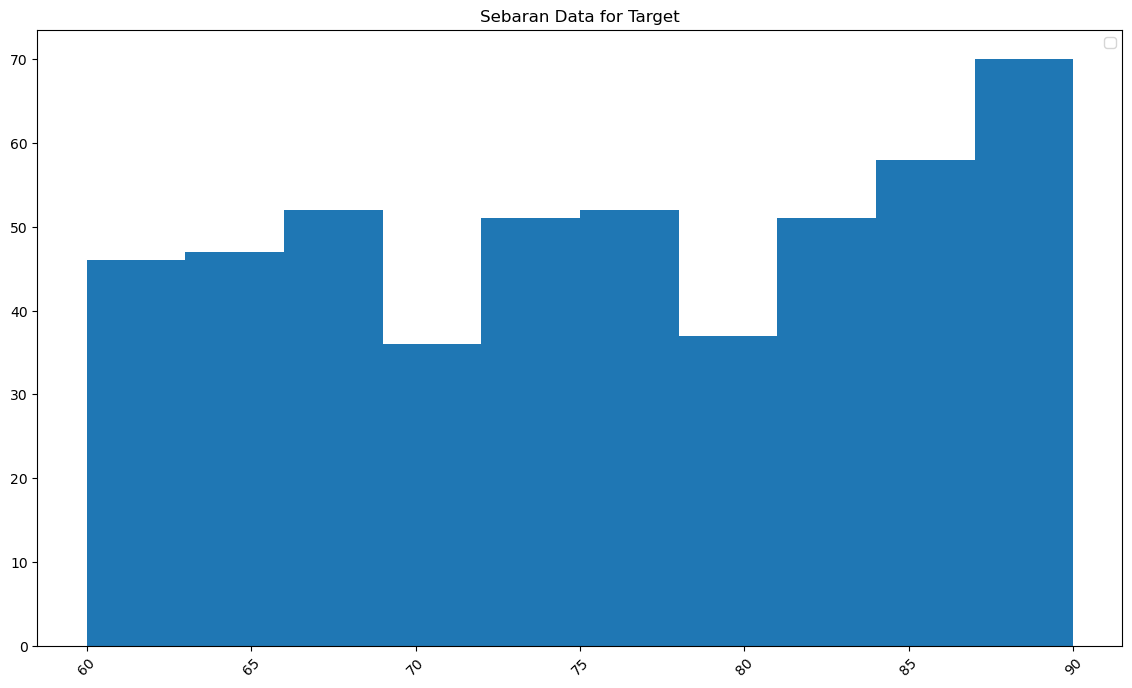

In [323]:
#melihat sebaran secara histogram untuk kolom numerik

for col in df_num.columns:
    plt.figure(figsize=(14, 8))
    # Use the actual column data for value_counts
    plt.hist(df_num[col])
    plt.title(f"Sebaran Data for {col}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [ ]:
# Memanggil barplot berdasarkan kolom tertentu
for col in df.columns:
    print(f'====== Grafik batang Jenis obesitas dengan {col} ======')
    ax = sns.barplot(data=df, x='NObeyesdad', y = col, hue='NObeyesdad')
    ax.bar_label(container=ax.containers[0], fontsize=10)
    plt.xticks(rotation = 90)
    plt.show()
    print("=====================================================")

## 5.4 Label Encoder

Label Encoder digunakan untuk melakukan kodifikasi terhadap variabel yang memiliki nilai kategorik menjadi nilai yang bersifat kuantitatif (non kategorik).

Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

In [ ]:
df.head(5)

Dari dataset yang kita miliki terdapat beberapa variabel yang perlu dilakukan transformasi data ke label encoder diantaranya : 
- Gender
- family_history_with_overweight
- FAVC
- CAEC
- SMOKE
- SCC
- CALC
- MTRANS 
- NObeyesdad

untuk membedakan hasil antara data yang telah dilakukan encoding dengan yang tidak maka kita perlu membuat 1 duplikat data dari data set awal df menjadi 'data label encoder' atau dle

In [ ]:
dlc = df.copy()
dlc.head()

In [ ]:
dlc["NObeyesdad"].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dle["NObeyesdad"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dle["NObeyesdad"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori': original_labels}

label = pd.DataFrame(labelkode)
label.sort_values(by='Kode', ascending=True, inplace=True)
label


### 5.4.1. Label Encoder Variabel Jenis Obesitas/ 'NObeyesdad'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["NObeyesdad"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["NObeyesdad"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori': original_labels}

labelobes = pd.DataFrame(labelkode)
labelobes.sort_values(by='Kode', ascending=True, inplace=True)
labelobes

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_Obes'] = le.fit_transform(dlc['NObeyesdad'])
dlc.head()

In [ ]:
labelobes

### 5.4.2. Label Encoder Variabel Riwayat Obesitas Keluarga/ 'family_history_with_overweight'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["family_history_with_overweight"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["family_history_with_overweight"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori': original_labels}

labelfamily = pd.DataFrame(labelkode)
labelfamily.sort_values(by='Kode', ascending=True, inplace=True)
labelfamily

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_Fam'] = le.fit_transform(dlc['family_history_with_overweight'])
dlc.tail()

### 5.4.3. Label Encoder Variabel Konsumsi Makanan Tinggi Kalori/ 'FAVC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["FAVC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["FAVC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori FAVC': original_labels}

labelFAVC = pd.DataFrame(labelkode)
labelFAVC.sort_values(by='Kode', ascending=True, inplace=True)
labelFAVC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_FAVC'] = le.fit_transform(dlc['FAVC'])
dlc.tail()

### 5.4.4. Label Encoder Variabel Konsumsi Cemilan diantara Waktu Makan/ 'CAEC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["CAEC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["CAEC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori CAEC': original_labels}

labelCAEC = pd.DataFrame(labelkode)
labelCAEC.sort_values(by='Kode', ascending=True, inplace=True)
labelCAEC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_CAEC'] = le.fit_transform(dlc['CAEC'])
dlc.tail()

### 5.4.5. Label Encoder Variabel Apakah mengkonsumsi rokok/ 'SMOKE'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["SMOKE"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["SMOKE"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori SMOKE': original_labels}

labelSMOKE = pd.DataFrame(labelkode)
labelSMOKE.sort_values(by='Kode', ascending=True, inplace=True)
labelSMOKE

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_SMOKE'] = le.fit_transform(dlc['SMOKE'])
dlc.tail()

### 5.4.6. Label Encoder Variabel Apakah melakukan kontrol konsumsi kalori harian / 'SCC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["SCC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["SCC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori SCC': original_labels}

labelSCC = pd.DataFrame(labelkode)
labelSCC.sort_values(by='Kode', ascending=True, inplace=True)
labelSCC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_SCC'] = le.fit_transform(dlc['SCC'])
dlc.tail()

### 5.4.7. Label Encoder Variabel Pola Konsumsi Alkohol / 'CALC'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["CALC"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["CALC"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori CALC': original_labels}

labelCALC = pd.DataFrame(labelkode)
labelCALC.sort_values(by='Kode', ascending=True, inplace=True)
labelCALC

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_CALC'] = le.fit_transform(dlc['CALC'])
dlc.tail()
labelCALC

### 5.4.8. Label Encoder Variabel Pola Transportasi Harian / 'MTRANS'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["MTRANS"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["MTRANS"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori MTRANS': original_labels}

labelMTRANS = pd.DataFrame(labelkode)
labelMTRANS.sort_values(by='Kode', ascending=True, inplace=True)
labelMTRANS

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_MTRANS'] = le.fit_transform(dlc['MTRANS'])
dlc.tail()
labelMTRANS

### 5.4.9. Label Encoder Variabel Jenis Kelamin / 'Gender'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to the labels
array = np.array(dlc["Gender"].unique())
le.fit(array)

# Transform the labels to normalized encoding
encoded_labels = le.transform(dlc["Gender"].unique())
print(encoded_labels) 

# Inverse transform to get the original labels
original_labels = le.inverse_transform(encoded_labels)
print(original_labels)
# Melihat hasil dari label encoder
labelkode = {'Kode': encoded_labels,
        'Kategori Gender': original_labels}

labelGender = pd.DataFrame(labelkode)
labelGender.sort_values(by='Kode', ascending=True, inplace=True)
labelGender

# Memaskukan Variabel Transformasi pada Dataset
dlc['En_Gender'] = le.fit_transform(dlc['Gender'])
dlc.tail()
labelGender

Dari hasil Encoding beberapa variabel diatas, untuk melihat perbedaan antara Data frame yang belum ter encoding dengan Data frame yang telah ditransformasi encoding maka perlu dibuat satu dataframe baru tanpa memuat variabel : 
- Gender
- family_history_with_overweight
- FAVC
- CAEC
- SMOKE
- SCC
- CALC
- MTRANS 
- NObeyesdad

In [ ]:
# Dropping specific columns
# 'dlc' is your original DataFrame
dfe = dlc.drop(['Gender', 'family_history_with_overweight', 'FAVC', 
                'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'], axis=1)

# Display the new DataFrame
dfe.head()


## 5.5 Korelasi Pearson

Pada langkah ini dilakukan pendeteksian seberapa kuat hubungan antara 2 variabel yang terdapat pada data set obesitas dengan rentang nilai -1 hingga 1 tetapi korelasi Pearson tidak memberikan informasi tentang penyebab dan akibat.

- Jika mendekati 1 maka menunjukkan hubungan linear positif antara 2 variabel
- Jika mendekati -1 maka menunjukkan hubungan linear negatif antara 2 variabel
- Jika mendekati 0 maka tidak ada hubungan

In [ ]:
# Menghitung korelasi antar kolom pada DataFrame 'df' menggunakan metode korelasi Pearson
pearson_corr = dfe.corr(method='pearson')

# Menampilkan nilai korelasi antar kolom dalam bentuk tabel
pearson_corr


In [ ]:
# Menghitung matriks korelasi antar kolom pada DataFrame 'df'
matrikscorr = dfe.corr()

In [ ]:
# Membuat gambar plot dengan ukuran (figsize) 15x8
plt.figure(figsize=(15, 8))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(matrikscorr, cmap='Reds', annot=True, annot_kws={'fontsize': 12})

# Menampilkan gambar plot
plt.show()


# 6. Preprocessing Data

Pada tahapan ini akan dilakukan beberapa perapihan data yang sekiranya perlu untuk dilakukan, seperti pengecekan outlier, penghapusan outlier, pengisian data missing value dan tindakan lainnya bila diperlukan.

## 6.1. Deteksi dan menangani Outlier

In [ ]:
# Melakukan copy data
dfe_1 = dfe.copy()

# Melihat susunan kolom dataset
dfe_1.columns.values

In [ ]:
dfe_1.head()

In [ ]:
# Melakukan pengecekan Outlier
kolom = dfe_1[['Age','Height','Weight']]
kolom.head()

In [ ]:
kolom.info()

In [ ]:
# Membuat iterasi pengecekan outlier dengan boxplot
for col in kolom:
    plt.boxplot(dfe_1[col], vert=True)
    plt.title(col)
    plt.show()

pada output pendeteksi outlier dari kolom dengan data yang bersifat numerical di atas dapat dilihat bahwa kolom:
+ Age
+ Height
+ Weight
kolom Age memiliki outlier yang banyak. Sehingga, harus dibersihkan outlier pada data

In [ ]:
df_outlier = dfe_1.copy()
kolom1 = np.array(df_outlier.columns.values)
print(kolom1)

In [ ]:
def remove_outliers(df_outlier):
    for col in df_outlier[['Age','Height','Weight']]:
        Q1 = df_outlier[col].quantile(0.25)
        Q3 = df_outlier[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df_outlier = df_outlier[(df_outlier[col] > lower_bound) & (df_outlier[col] < upper_bound)]
    return df_outlier

df_clean = remove_outliers(df_outlier)

In [ ]:
df_clean.info()

In [ ]:
for col in df_clean[['Age','Height','Weight']]:
    plt.boxplot(df_clean[col],vert=True)
    plt.title(col)
    plt.show()

dari hasil diatas terlihat bahwa untuk data outlier yang terdapat pada 3 kolom numerik(Age,Height dan Weight)sudah dilakukan eliminasi sehingga data yang terdapat pada dataaset pun berkurang akibat dari pembersihan data outlier.

## 6.2. Korelasi Matriks (Data Clean)

In [ ]:
korelasi = df_clean.corr()
korelasi

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(korelasi, cmap='Reds', annot=True, annot_kws={'fontsize':12})
plt.show()

pada matrik korelasi di atas, setelah dilakukan pembersihan pada kolom yang mengalami outlier, terdapat peningkatan korelasi pada kolom Age dan Weight namun pada kolom Height justru mengalami penurunan.
- Hasil Korelasi yang memiliki korelasi bersifat positif(hubungan berbanding lurus) terdapat antara hubungan **Obesitas** dengan **Age, Height, Weight, FCVC, CH20, En_Fam, En_FAVC, En_CAEC, dan EN_Gender**
- Sedangkan korelasi yang memiliki korelasi bersifat negatif(hubungan berbanding terbalik) adalah hubungan antara **Obesitas** dengan **NCP,FAF,TUE,En_SMOKE,En_SCC, En_MTRANS dan En_CALC**

In [ ]:
df_clean.info()

In [ ]:
## Analisis Hasil Jurnal

## 7. Model Inference

In [ ]:
# Membuat objek model individu
rf = RandomForestClassifier()
nb = GaussianNB()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()

## 8. Pelatihan Model

In [ ]:
x = df_clean.drop("En_Obes",axis=1)
y = df_clean["En_Obes"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat model ensemble menggunakan RandomForestClassifier, GaussianNB, ExtraTreesClassifier, dan GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
et_model = ExtraTreesClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Melatih model-model individu
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


## 9. Modeling

In [ ]:
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Membuat objek model individu
rf = RandomForestClassifier()
nb = GaussianNB()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
data = load_iris()

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# create model instance
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


# Melatih ensemble model
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
et.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Memprediksi data uji menggunakan ensemble model
rf.predict(X_test)
nb.predict(X_test)
et.predict(X_test)
gb.predict(X_test)
xgb.predict(X_test)



# Melatih model-model individu
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
et.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Memprediksi data uji menggunakan model-model individu
rf_predictions = rf.predict(X_test)
nb_predictions = nb.predict(X_test)
et_predictions = et.predict(X_test)
gb_predictions = gb.predict(X_test)
xgb_predictions = xgb.predict(X_test)

In [ ]:
# Evaluasi performa model-model individu
print("===========================================================")
print("================ Random Forest Classifier =================")
print("===========================================================")
print(classification_report(y_test, rf_predictions))
print("===========================================================")
print("============= Gaussian Naive Bayes Classifier =============")
print('===========================================================')
print(classification_report(y_test, nb_predictions))
print("===========================================================")
print("================= Extra Trees Classifier ==================")
print('===========================================================')
print(classification_report(y_test, et_predictions))
print("===========================================================")
print("============== gradient Boosting Clasifier ================")
print('===========================================================')
print(classification_report(y_test, gb_predictions))
print("===========================================================")
print("========== Extreme gradient Boosting Classifier ===========")
print('===========================================================')
print(classification_report(y_test, xgb_predictions))

In [ ]:
np.array(labelobes["Kategori"])

In [ ]:
## Evaluasi dan Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

names = ['Random Forest', 'Gaussian NB', 'Extra Trees', 'Gradient Boosting', 'Extreme Gradient Boosting']
models = [rf_predictions, nb_predictions, et_predictions, gb_predictions, xgb_predictions]

for name, model in zip(names, models):  # Pair each model name with its predictions
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, model), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                             'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'],
                yticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                             'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {name} (ratio 80:20)")
    plt.show()
    
    


## 9.1. Tuning Data

In [ ]:
f_i = list(zip(df_clean,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

menghapus kolom yang memiliki nilai yang rendah yaitu **En_FAVC, En_SCC, En_Fam, En_CALC, En_SMOKE, En_CAEC**

Berdasarkan kesimpulan pada target kelas yang imbalanced, dapat diterapkan resampling menggunakan teknik Synthetic Minority Over-sampling Technique (SMOTE)

yaitu metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas

In [ ]:
# Melakukan duplikasi data
df_clean2 = df_clean.copy()
df_clean2.head()

In [ ]:
x2 = df_clean2.drop(["En_Obes","En_FAVC","En_FAVC","En_SCC","En_Fam","En_CALC","En_SMOKE","En_CAEC"],axis=1)
y2 = df_clean2["En_Obes"]

X_train, X_test, y_train, y_test =train_test_split(x2, y2, test_size=0.2, random_state=42)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x2, y2)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat model ensemble menggunakan RandomForestClassifier, GaussianNB, ExtraTreesClassifier, dan GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state=42)


# Melatih model-model individu

rf_model.fit(X_train, y_train)
rf_predictions2 = rf_model.predict(X_test)

print("\nExtra Trees Classifier:")
print(classification_report(y_test, rf_predictions2))

In [ ]:
df_clean2.info()

## 10. Model Inference

In [ ]:
test1 = {'Age' : [15,25,38],
         'Height' : [165,178,183],
         'Weight' : [76,64,59],
         'FCVC' : [0,1,2],
         'NCP' : [3,1,2],
         'CH2O' : [2,1,1],
         'FAF' : [0,2,3],
         'TUE' : [0,0,1],
         'En_Fam' : [0,1,1],
         'En_FAVC' : [0,1,1],
         'En_CAEC' : [2,1,1],
         'En_SMOKE' : [0,0,1],
         'En_SCC' : [0,1,0],
         'En_CALC' : [0,1,0],
         'En_MTRANS ' : [2,3,4],
         'En_Gender' : [1,0,1]
        }
test1 = pd.DataFrame(test1)
test1

## 11. Referensi dan Seleksi Variabel pada Model 

Berdasarkan penelitian yang dilakukan oleh RezkiaNadiaPutri,et al 2022, Terdapat beberapa Faktor yang berhubungan dengan kejadian obesitas sentral pada remaja usia 15-18 tahun di Provinsi DKI Jakarta, faktor tersebut diantaranya : 
1. Jenis Kelamin 
2. Status Merokok

sumber : https://ejournal.undip.ac.id/index.php/mkmi/article/view/43473/22052

sedangkan menurut Syifa Arifani dan Zulia Setiyaningrum, 2021, adapun faktor Perilaku Berisiko Yang Berhubungan Dengan Kejadian diantaranya : 
1. Perilaku merokok
2. Makanan Manis
3. Minuman Manis
4. Soft Drink
5. Makanan Instan

pada poin ke 2 s.d 4 terdapat hubungan antara variabel yang digunakan pada dataset, yaitu pola konsumsi makanan tinggi kalori. 
sumber : https://www.bing.com/ck/a?!&&p=2193fd3a35a03985b63f4d265b23988b71822176abb5cdf5c9fccb785e40d1c1JmltdHM9MTc0MTgyNDAwMA&ptn=3&ver=2&hsh=4&fclid=161541b8-bd45-6014-2770-5064bc25616b&psq=penyebab+obesitas+jurnal&u=a1aHR0cHM6Ly9qb3VybmFscy51bXMuYWMuaWQvaW5kZXgucGhwL2prL2FydGljbGUvZG93bmxvYWQvMTM3MzgvcGRm&ntb=1


berdasarkan hal tersebut maka perlu dilakukan uji korelasi antara variabel prediktor dengan variabel target melalui uji statistik untuk menentukan apakah variabel tersebut dapat kita gunakan ke dalam model.

In [ ]:
df_clean2.info()

## Uji Korelasi Matrix

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Example correlation matrix
correlation_matrix = korelasi

# Assume a sample size (n)
n = 10  # Replace with your actual sample size
df = n - 2  # Degrees of freedom

# Function to compute p-value matrix from correlation matrix
def calculate_pval_from_corr(corr_matrix, sample_size):
    n = sample_size
    df = n - 2
    t_values = corr_matrix * np.sqrt(df / (1 - corr_matrix**2))  # t-statistic
    p_values = 2 * (1 - t.cdf(abs(t_values), df))  # two-tailed p-values
    np.fill_diagonal(p_values, 0)  # Set diagonal to 0 (self-correlation p-values)
    return p_values

# Compute p-value matrix
pvalue_matrix = calculate_pval_from_corr(correlation_matrix, n)

# Convert to pandas DataFrame for display
pvalue_df = pd.DataFrame(pvalue_matrix, columns=[korelasi.columns], index=[korelasi.columns])
print("P-Value Matrix:")
print(pvalue_df)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# mengambil dataset
dfc = df_clean2.copy()
dfc = dfc.drop(['Age','Height','Weight'],axis=1)

# membuat fungsi Cramers V untuk korelasi data kategorik
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# melakukan looping untuk setiap kolom dataset
columns = dfc.columns
results = {}

for col1 in columns:
    for col2 in columns:
        if col1 != col2:  #menghindari perbandingnan sendiri
            key = f"{col1} vs {col2}"
            results[key] = cramers_v(dfc[col1], dfc[col2])

# hasil
for pair, value in results.items():
    print(f"{pair}: {value:.2f}")



In [ ]:
cramers_v()

## 12. Kesimpulan

In [ ]:
penjelasan

In [ ]:
df_clean2.info()

Dari final proyek yang telah dibuat dapat disimpulkan bahwa : 
dataset yang digunakan berisi 17 kolom dan 1932 baris (setelah dilakukan pembersihan outlier), selanjutnya dilakukan eksplorasi data (bar chart, pie chart, boxplot) dimana dilakukan visualisasi yaitu perbandingan nilai pada kolom obesitas kepada kolom2 lain sebagai variabel.kolom prediktor, diantaranya : 
1. perbandingan Kolom "Age/Usia" dengan "Level Obesitas"
2. perbandingan Kolom "Height/Tinggi badan" dengan "Level Obesitas"
3. perbandingan Kolom "Weight/Berat Badan" dengan "Level Obesitas"
4. perbandingan Kolom "FCVC/Pola Konsumsi Buah-buahan" dengan "Level Obesitas"
5. perbandingan Kolom "NCP/Jumlah makan utama perhari" dengan "Level Obesitas"
6. perbandingan Kolom "CH2O/Pola konsumsi air" dengan "Level Obesitas"
7. perbandingan Kolom "FAF/Frekuensi Aktifitas Fisik" dengan "Level Obesitas"
8. perbandingan Kolom "TUE/Pemakaian Teknologi" dengan "Level Obesitas"
9. perbandingan Kolom "Fam/Riwayat Obesitas Keluarga" dengan "Level Obesitas"
10. perbandingan Kolom "FAVC/Konsumsi makanan tinggi kalori" dengan "Level Obesitas"
11. perbandingan Kolom "CAEC/Konsumsi cemilan dintara waktu makan" dengan "Level Obesitas"
12. perbandingan Kolom "SMOKE/Konsumsi Rokok" dengan "Level Obesitas"
13. perbandingan Kolom "SCC/Kontrol kalori" dengan "Level Obesitas"
14. perbandingan Kolom "CALC/Konsumsi Alkohol" dengan "Level Obesitas"
15. perbandingan Kolom "MTRANS/Transportasi publik yang digunakan" dengan "Level Obesitas"
16. perbandingan Kolom "Gender/Jenis Kelamin" dengan "Level Obesitas"

In [ ]:
labelobes

Dari tabel di atas, terlihat bahwa Kolom **En_Obes** merupakan target yang ingin diprediksi dengan nilai 0-6 yang menunjukkan level atau tingkat keparahan obesitas yang cenderung diderita seseorang, apakah masuk kedalam kategori, kurang berat badan, ideal atau berat badan berlebih hingga level obesitas tertentu. kategori obesitas akan diprediksi berdasarkan bebarapa variabel-variabel prediktor yang sudah dilakukan analisis.


# 13. Program Deployment (basic)

Dari hasil diatas running model terdapat 3 model terbaik yang dapat kita pertimbangkan untuk dibuat deployment nya, yaitu model Random Forest dengan akurasi 95 persen, model Extra Trees dengan akurasi 96 persen dan Gradient Boosting dengan Akurasi 97 persen. Ketiga model tersebut dijalankan dengan mode rasio test 20 persen data tanpa menggunakan oversampling/under sampling

In [ ]:
import joblib
joblib.dump(rf,"model_random_forest.joblib")

In [ ]:
import joblib
joblib.dump(et,"model_extra_trees.joblib")

In [ ]:
import joblib
joblib.dump(gb,"model_gradient_boosting.joblib")

In [ ]:
import pickle
with open ('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import pickle
with open ('model_et.pkl', 'wb') as f:
    pickle.dump(et, f)

In [ ]:
import pickle
with open ('model_gb.pkl', 'wb') as f:
    pickle.dump(gb, f)

In [ ]:
muat_model_rf = joblib.load("model_random_forest.joblib")
muat_model_et = joblib.load("model_extra_trees.joblib")
muat_model_gb = joblib.load("model_gradient_boosting.joblib")

In [ ]:
df_clean2.info()

In [ ]:
def prediksi_obesitas(model) : 
    print("=== Silakan masukkan data pasien ===") 
    Age = float(input("Masukan Usia : "))
    Height = float(input("Masukan Tinggi Badan : "))
    Weight = float(input("Masukan Berat Badan : "))     
    FCVC	= float(input("Frekuensi mengonsumsi buah-buahan (1=Tidak Pernah,2=Jarang, 3 = Sering):"))
    NCP = float(input("Jumlah makanan utama per hariJumlah makanan utama per hari : "))     
    CH2O = float(input("Konsumsi minum perhari  :"))
    FAF = float(input("Frekuensi melakukan aktivitas fisik (skala 0 s.d 3) :"))
    TUE = float(input("Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3):"))
    En_Fam = int(input("Apakah ada riwayat Obesitas [0=tidak, 1=ya]: "))
    En_FAVC = int(input("Apakah seseorang sering mengkonsumsi makanan tinggi kalori [0=tidak, 1=ya] : "))          
    En_CAEC = int(input("Frekuensi mengkonsumsi cemilan diantara waktu makan (3 = Tidak pernah,2=jarang,1=sering,0=selalu) :"))           
    En_SMOKE = int(input("Frekuensi mengkonsumsi ROKOK(1=YA,0=TIDAK) :"))          
    En_SCC	= int(input("Apakah seseorang melakukan kontrol terhadap kalori harian(ya = 1/tidak = 0) :"))
    En_CALC = int(input("Frekuensi mengkonsumsi alkohol (3=Tidak pernah,2=Jarang,1=Sering,0=Selalu):"))
    En_MTRANS = int(input("Moda utama yang digunakan untuk transportasi (0=Mobil,1=Sepeda,2=Sepeda Motor,3=Transportasi umum,4= Jalan kaki):"))
    En_Gender = int(input("Masukan Jenis Kelamin [0=Laki-Laki,1=Perempuan]: "))                
                        
    data_baru = np.array(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','En_Fam', 'En_FAVC', 'En_CAEC', 'En_SMOKE', 'En_SCC','En_CALC', 'En_MTRANS', 'En_Gender'])
    data_baru = data_baru.reshape(1,-1)
    prediksi_baru = model.predict(data_baru)
    
    if prediksi_baru ==0:
        print("Pasien kekurangan Berat Badan")
    elif prediksi_baru ==1:
        print("Pasien Berat Badan Normal")
    elif prediksi_baru ==2:
        print("Pasien Berat Badan Obesitas Tipe I")
    elif prediksi_baru ==3:
        print("Pasien Berat Badan Obesitas Tipe II")
    elif prediksi_baru ==4:
        print("Pasien Berat Badan Obesitas Tipe III")
    elif prediksi_baru ==5:
        print("Pasien Berat Badan Lebih Tipe I")
    else : 
        print("Pasien Berat Badan Lebih Tipe II")
        

In [ ]:
df_clean2.to_csv("df_clean2.csv")

In [ ]:
prediksi_obesitas(muat_model_rf)

In [ ]:
labelGender